# Plotting Query Results

## Setup

In [6]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [7]:
import pandas as pd

In [8]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
Base = automap_base()

In [9]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///../Resources/emoji.sqlite", echo=False)

## Explore Database

In [28]:
# Use the Inspector to explore the database and print the table names
# YOUR CODE HERE
Base.prepare(engine, reflect=True)
table_name=Base.classes.keys()
table_name

['emoji']

In [151]:
# Use Inspector to print the column names and types
# YOUR CODE HERE
Emoji_vars = Base.classes.emoji
print("Column names and types")
for c in Emoji_vars.__table__.columns:
    print(f"{c.name}    --------------    {c.type}")

Column names and types
id    --------------    INTEGER
emoji_char    --------------    TEXT
emoji_id    --------------    TEXT
name    --------------    TEXT
score    --------------    INTEGER


In [85]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
# YOUR CODE HERE
result = engine.execute("select *\
                        from emoji\
                        limit 10")
for row in result:
    print(row)

(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150)
(2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939)
(3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416)
(4, '♥️', '2665', 'BLACK HEART SUIT', 652715459)
(5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922)
(6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701)
(7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849)
(8, '😒', '1F612', 'UNAMUSED FACE', 441690175)
(9, '💕', '1F495', 'TWO HEARTS', 381679908)
(10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)


## Reflect database and Query

In [86]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [87]:
# Start a session to query the database
session = Session(engine)

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [101]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
# YOUR CODE HERE
import pandas as pd
conn = engine.connect()
results = pd.read_sql("SELECT emoji_char, emoji_id, score\
                        FROM emoji\
                        ORDER BY score DESC\
                        LIMIT 10", conn)
results

,emoji_char,emoji_id,score
0,😂,1F602,1814832150
1,❤️,2764,840619939
2,😍,1F60D,680382416
3,♥️,2665,652715459
4,😭,1F62D,515991922
5,😊,1F60A,484540701
6,♻️,267B,452489849
7,😒,1F612,441690175
8,💕,1F495,381679908
9,😘,1F618,377847645


Unpack tuples using list comprehensions

In [102]:
# Unpack the `emoji_id` and `scores` from results and save into separate lists
# YOUR CODE HERE
emoji_id=results['emoji_id']
scores=results['score']

## Plot using Matplotlib

Text(0.5, 1.0, 'Emoji Scores (*1e9)')

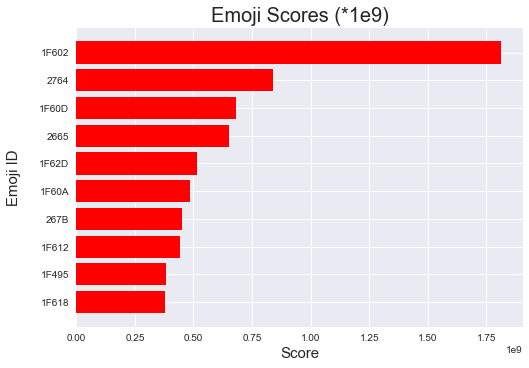

In [147]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
# YOUR CODE HERE
import matplotlib.pyplot as plt
plt.barh(emoji_id,scores,align='center',color='red')
plt.gca().invert_yaxis()
plt.xlabel('Score',fontsize=15)
plt.ylabel('Emoji ID',fontsize=15,labelpad=18)
plt.title('Emoji Scores (*1e9)',fontsize=20)

## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [140]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
# YOUR CODE HERE
df=results.set_index("emoji_id")
df.head(10)

,emoji_char,score
emoji_id,,
1F602,😂,1814832150
2764,❤️,840619939
1F60D,😍,680382416
2665,♥️,652715459
1F62D,😭,515991922
1F60A,😊,484540701
267B,♻️,452489849
1F612,😒,441690175
1F495,💕,381679908


Plot using Pandas

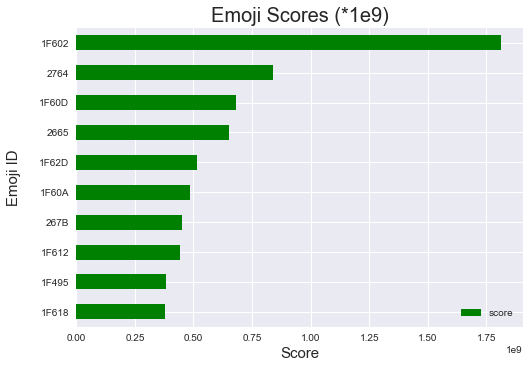

In [146]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
# YOUR CODE HERE
df.plot(kind="barh",color='green')
plt.xlabel('Score',fontsize=15)
plt.ylabel('Emoji ID',fontsize=15,labelpad=18)
plt.title('Emoji Scores (*1e9)',fontsize=20)
plt.gca().invert_yaxis()

In [ ]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
# YOUR CODE HERE